In [14]:
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

import warnings
warnings.filterwarnings('ignore')

In [3]:
import os

WORKING_DIR = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
DATA_ROOT_DIR = os.path.join(WORKING_DIR, 'data')
DATA_MUSIC_DIR = os.path.join(DATA_ROOT_DIR, 'genres_original')

KeyboardInterrupt: 

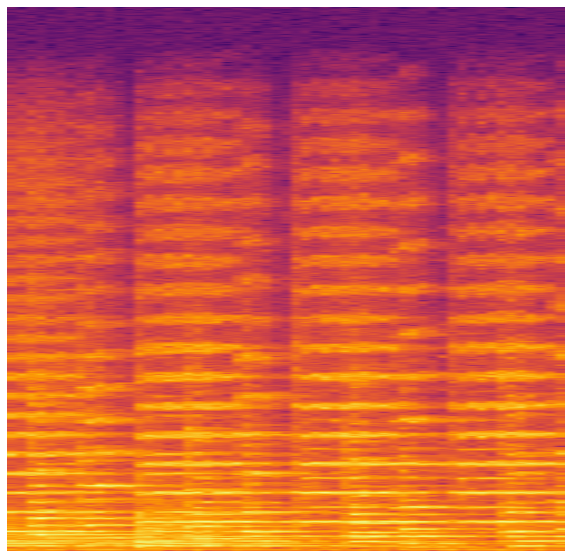

In [10]:
# Extracting the spectogram for every audio
cmap = plt.get_cmap('inferno')

plt.figure(figsize=(10, 10))
genres = os.listdir(f'{DATA_MUSIC_DIR}')

for genre in genres:
    pathlib.Path(f'{DATA_ROOT_DIR}/img_data/{genre}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'{DATA_MUSIC_DIR}/{genre}'):
        absolute_song_path = f'{DATA_MUSIC_DIR}/{genre}/{filename}'
        y, sr = librosa.load(absolute_song_path, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128,
                     cmap=cmap, sides='default', mode='default', scale='dB')
        plt.axis('off')
        plt.savefig(f'{DATA_ROOT_DIR}/img_data/{genre}/{filename[:-3].replace(".", "")}.png')
        plt.clf()


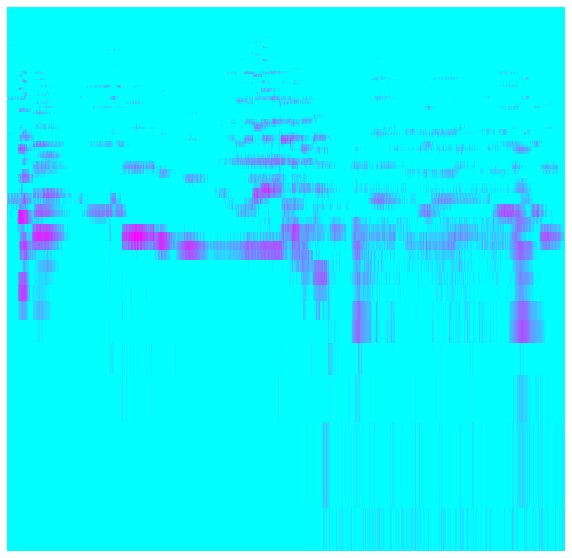

In [16]:
# Extracting Mel spectograms

hop_length = 512  # number audio of frames between STFT columns (looks like a good default)
y, sr = librosa.load(f'{DATA_MUSIC_DIR}/classical/classical.00036.wav')
y, _ = librosa.effects.trim(y)

S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize=(10, 10))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log',
                         cmap='cool')
plt.axis('off')
plt.show()